# Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_invoice_data():
    return pd.read_excel("datasets/train.xlsx")

invoice_df = load_invoice_data()

In [24]:
invoice_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,19.50
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,15.00


In [26]:
invoice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276190 entries, 1 to 379335
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    276190 non-null  object        
 1   StockCode    276190 non-null  object        
 2   Description  276190 non-null  object        
 3   Quantity     276190 non-null  int64         
 4   InvoiceDate  276190 non-null  datetime64[ns]
 5   UnitPrice    276190 non-null  float64       
 6   CustomerID   276190 non-null  float64       
 7   Country      276190 non-null  object        
 8   TotalSum     276190 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [5]:
invoice_df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [6]:
invoice_df['InvoiceDate'] = pd.to_datetime(invoice_df['InvoiceDate'])

invoice_df = invoice_df.dropna(subset=['CustomerID'])

invoice_df['InvoiceNo'] = invoice_df['InvoiceNo'].astype(str)
invoice_df = invoice_df[~invoice_df['InvoiceNo'].str.startswith('C')]

In [7]:
negative_unit_price = (invoice_df['UnitPrice'] <= 0).sum()

negative_quantity = (invoice_df['Quantity'] <= 0).sum()

(negative_unit_price, negative_quantity)

(31, 0)

In [8]:
invoice_df = invoice_df[(invoice_df['UnitPrice'] > 0) & (invoice_df['Quantity'] > 0)]

In [9]:
invoice_df['TotalSum'] = invoice_df['Quantity'] * invoice_df['UnitPrice']

#### Handling Duplicate Records

In [10]:
duplicate_count = invoice_df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")

invoice_df = invoice_df.drop_duplicates()

Number of duplicate records: 2638


#### Descriptive Analytics

In [11]:
invoice_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSum
count,276190.000000,276190,276190.000000,276190.000000,276190.000000
mean,13.202719,2011-07-10 13:51:30.167928064,3.117113,15290.353670,22.764697
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-06 15:47:00,1.250000,13969.000000,4.950000
50%,6.000000,2011-07-29 16:24:00,1.950000,15153.000000,11.900000
75%,12.000000,2011-10-20 12:33:15,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,4161.060000,18287.000000,168469.600000
std,213.415620,NaN,19.736248,1712.161155,367.237241


In [12]:
invoice_df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,276190.000000,276190.000000
mean,13.202719,3.117113
std,213.415620,19.736248
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,4161.060000


In [13]:
unique_counts = {col: invoice_df[col].nunique() for col in ['CustomerID', 'StockCode', 'InvoiceNo']}
unique_counts

{'CustomerID': 4320, 'StockCode': 3611, 'InvoiceNo': 17995}

In [14]:
invoice_df["Quantity"]

1          8
2          2
3          1
4         10
5          4
          ..
379328     2
379330     5
379333     1
379334    60
379335    12
Name: Quantity, Length: 276190, dtype: int64

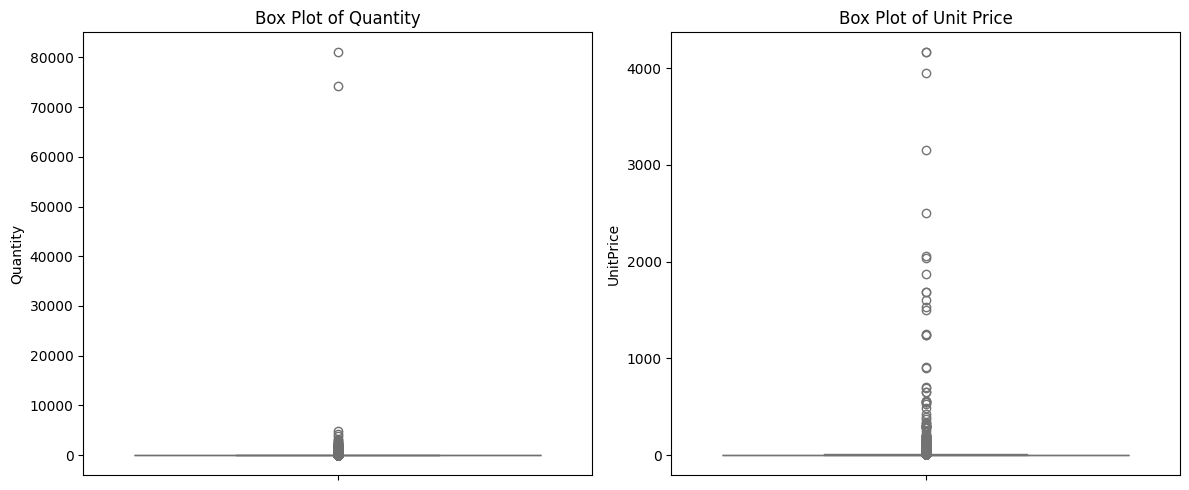

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=invoice_df['Quantity'], ax=axes[0], color='skyblue')
axes[0].set_title("Box Plot of Quantity")

sns.boxplot(y=invoice_df['UnitPrice'], ax=axes[1], color='lightgreen')
axes[1].set_title("Box Plot of Unit Price")

plt.tight_layout()
plt.show()


In [46]:
invoice_df['InvoiceDate'] = pd.to_datetime(invoice_df['InvoiceDate'])
invoice_df['Week'] = invoice_df['InvoiceDate'].dt.isocalendar().week

# courses.groupby(['class'], as_index=False).agg({'student':'count'}).query('student>=5').filter(['class'])


test_df = invoice_df.groupby(['CustomerID','Week'], as_index=False).agg( {'InvoiceNo': 'count'})
test_df = test_df.loc[test_df['InvoiceNo'] > 5]
test_df = test_df.groupby(['Week'], as_index=False).agg( {'CustomerID': 'count'}).filter(['Week','CustomerID'])
test_df

,Week,CustomerID
0,1,162
1,2,153
2,3,132
3,4,193
4,5,179
5,6,133
6,7,174
7,8,192
8,9,181
9,10,171


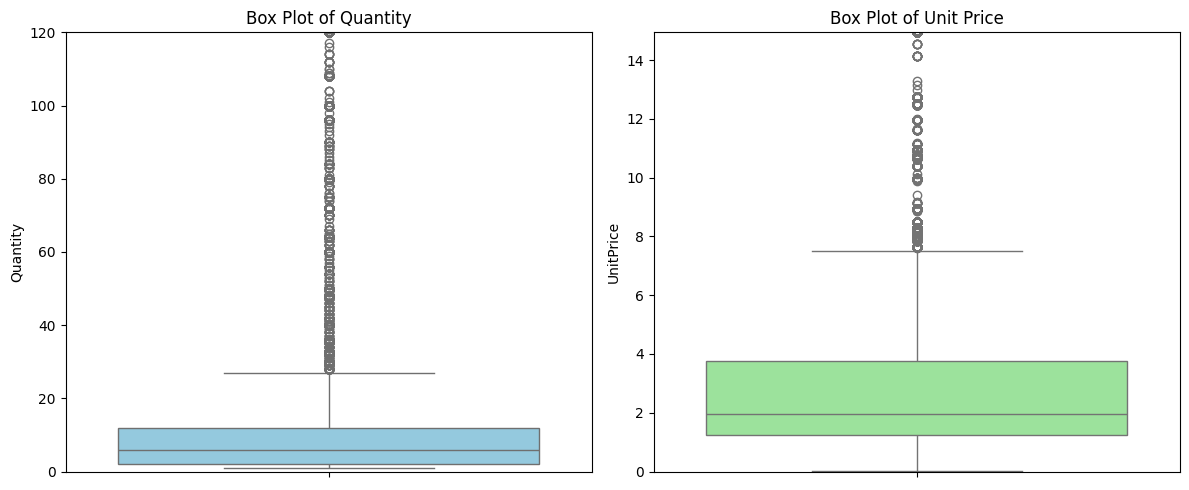

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=invoice_df['Quantity'], ax=axes[0], color='skyblue')
axes[0].set_title("Box Plot of Quantity")
axes[0].set_ylim([0, invoice_df['Quantity'].quantile(0.99)])

sns.boxplot(y=invoice_df['UnitPrice'], ax=axes[1], color='lightgreen')
axes[1].set_title("Box Plot of Unit Price")
axes[1].set_ylim([0, invoice_df['UnitPrice'].quantile(0.99)])

plt.tight_layout()
plt.show()

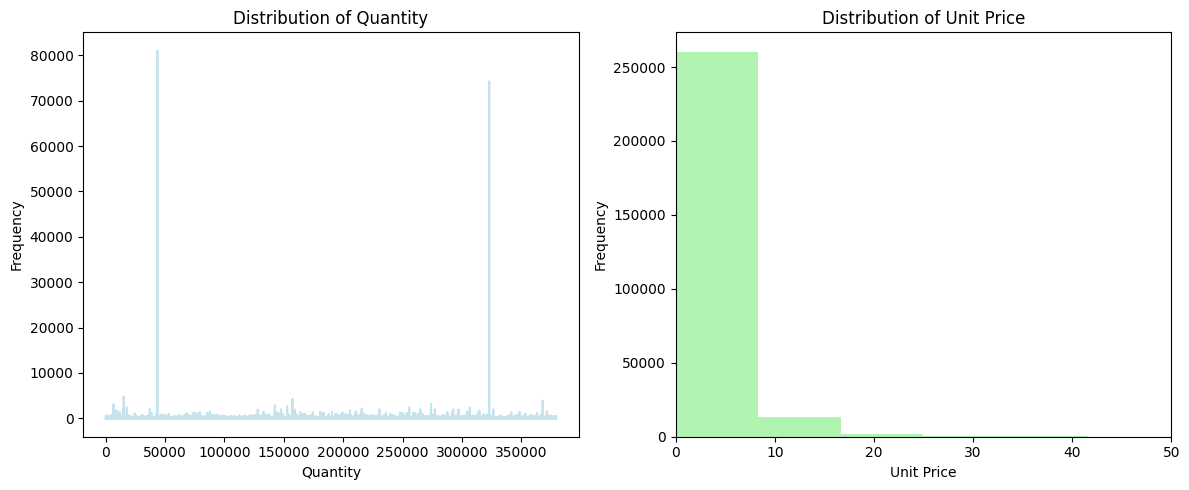

In [17]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(invoice_df['Quantity'], color='lightblue', alpha=0.7)
axes[0].set_title('Distribution of Quantity')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

axes[1].hist(invoice_df['UnitPrice'], bins=500, color='lightgreen', alpha=0.7)
axes[1].set_title('Distribution of Unit Price')
axes[1].set_xlabel('Unit Price')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim([0, 50])

plt.tight_layout()
plt.show()


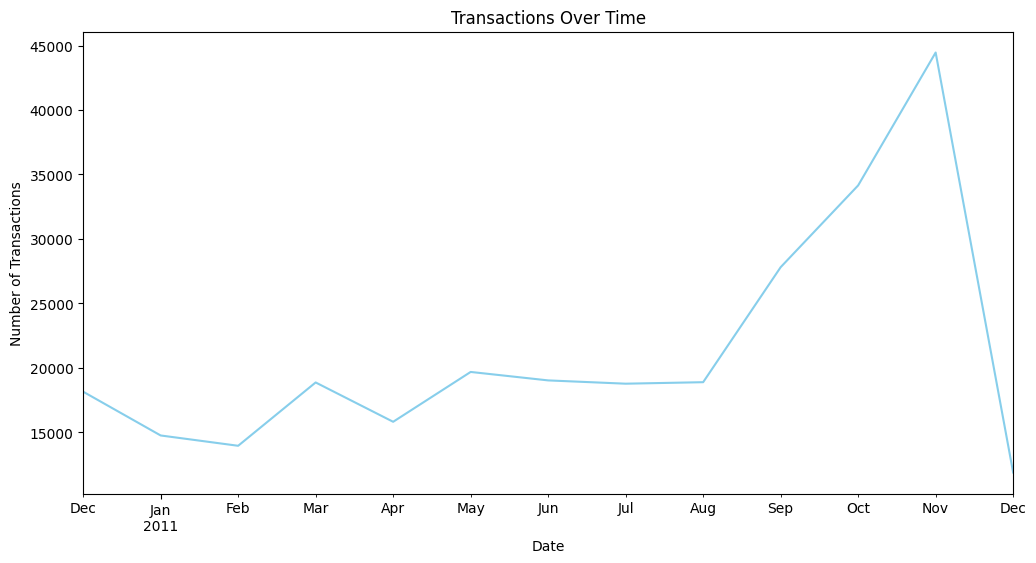

In [18]:
plt.figure(figsize=(12, 6))
invoice_df.resample('ME', on='InvoiceDate').size().plot(title="Transactions Over Time", color='skyblue')
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.show()

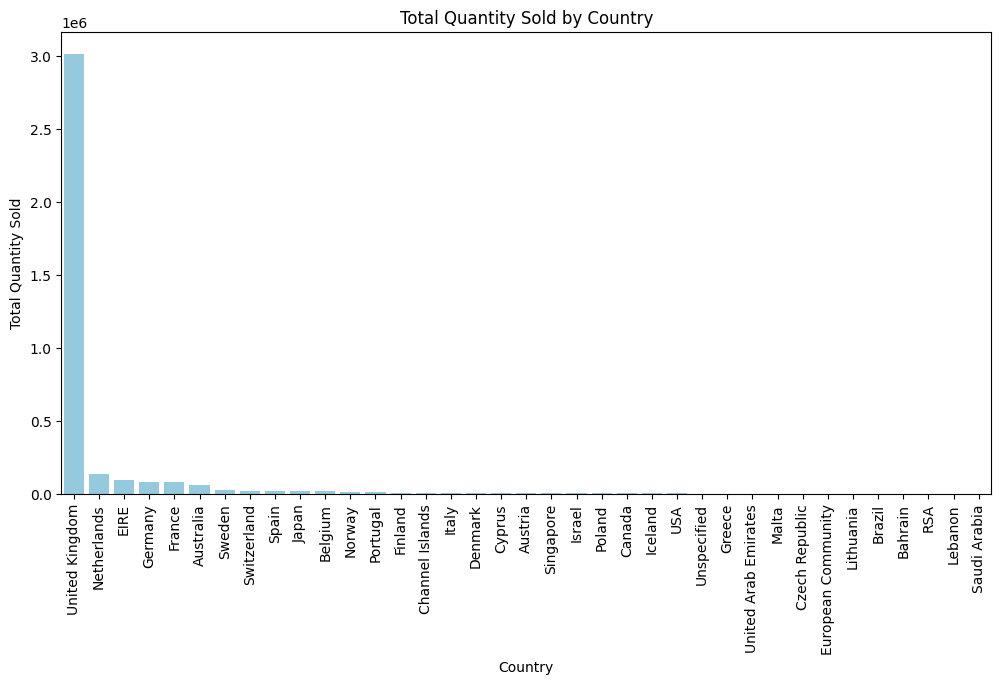

In [19]:
country_sales = invoice_df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, color='skyblue')

plt.title('Total Quantity Sold by Country')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)

plt.show()


Top 10 highest spending customers:

<Axes: xlabel='CustomerID'>

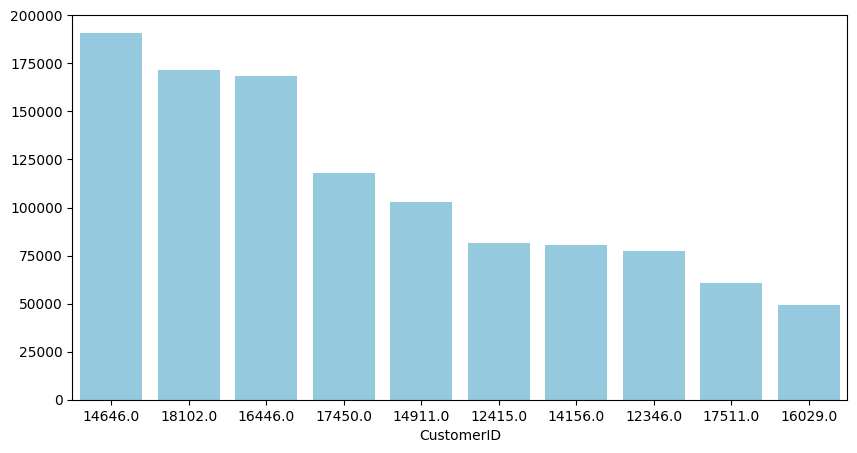

In [20]:
top_customers = (
    invoice_df.groupby('CustomerID')['TotalSum']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, color='skyblue')

# Data Transformation

In [21]:
invoice_df['CohortMonth'] = invoice_df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

invoice_df['TransactionMonth'] = invoice_df['InvoiceDate'].dt.to_period('M')

def get_cohort_index(df):
    year_diff = df['TransactionMonth'].dt.year - df['CohortMonth'].dt.year
    month_diff = df['TransactionMonth'].dt.month - df['CohortMonth'].dt.month
    return year_diff * 12 + month_diff + 1 

invoice_df['CohortIndex'] = get_cohort_index(invoice_df)

cohort_counts = invoice_df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,872.0,319.0,276.0,331.0,316.0,347.0,316.0,300.0,306.0,343.0,326.0,433.0,228.0
2011-01,416.0,92.0,112.0,97.0,136.0,117.0,105.0,102.0,127.0,136.0,154.0,52.0,NaN
2011-02,377.0,71.0,71.0,103.0,102.0,92.0,93.0,100.0,94.0,114.0,26.0,NaN,NaN
2011-03,450.0,66.0,112.0,90.0,101.0,75.0,119.0,102.0,124.0,37.0,NaN,NaN,NaN
2011-04,299.0,62.0,60.0,60.0,58.0,68.0,65.0,78.0,21.0,NaN,NaN,NaN,NaN
2011-05,283.0,53.0,48.0,49.0,58.0,68.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,244.0,41.0,37.0,62.0,55.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,190.0,35.0,38.0,43.0,54.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,168.0,35.0,41.0,40.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
invoice_df = invoice_df.iloc[:, :-3]


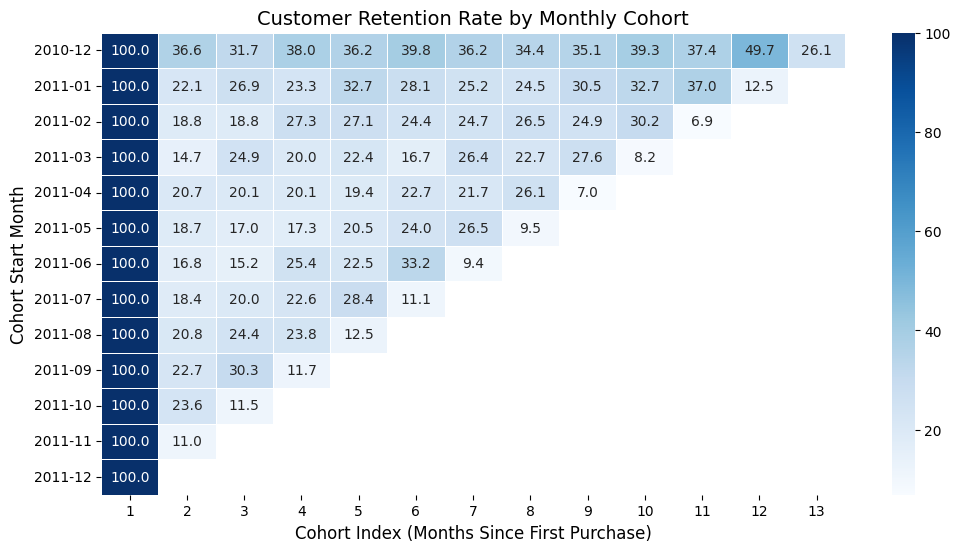

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

cohort_sizes = cohort_pivot.iloc[:, 0] 
retention_rates = cohort_pivot.divide(cohort_sizes, axis=0)

retention_rates = retention_rates.round(3) * 100

plt.figure(figsize=(12, 6))
sns.heatmap(retention_rates, annot=True, fmt=".1f", cmap="Blues", linewidths=0.5)

plt.title("Customer Retention Rate by Monthly Cohort", fontsize=14)
plt.xlabel("Cohort Index (Months Since First Purchase)", fontsize=12)
plt.ylabel("Cohort Start Month", fontsize=12)

plt.show()


# RFM Data Modeling

In [24]:
snapshot_date = invoice_df['InvoiceDate'].max()

rfm = invoice_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSum': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1  77183.60
12347.0           1          7   3124.96
12348.0          74          4   1009.88
12349.0          18          1   1344.17
12350.0         309          1    213.30


In [25]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

print(rfm.head())


            Recency  Frequency  Monetary R_Score F_Score M_Score  RFM_Score
CustomerID                                                                 
12346.0         325          1  77183.60       1       1       5          7
12347.0           1          7   3124.96       5       5       5         15
12348.0          74          4   1009.88       2       4       4         10
12349.0          18          1   1344.17       4       1       4          9
12350.0         309          1    213.30       1       1       2          4


In [26]:
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

def segment_customer(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])

    if r >= 4 and f >= 4 and m >= 4:
        return 'VIP Customers'  # خریدهای زیاد، اخیر و پرهزینه
    elif r >= 4 and (f >= 3 or m >= 3):
        return 'Loyal Customers'  # خریدهای اخیر اما شاید کم‌تر
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Regular Customers'  # مشتریان متوسط و فعال
    elif r <= 2 and f >= 4 and m >= 4:
        return 'High Value but Churning'  # مشتریان باارزش که خریدشان کم شده
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Lost Customers'  # مشتریانی که مدت زیادی خرید نکرده‌اند
    elif r <= 3 and (f <= 2 or m <= 2):
        return 'At Risk Customers'  # مشتریانی که احتمال ریزش دارند
    else:
        return 'Other'

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)

rfm[['Customer_Segment']].head()


,Customer_Segment
CustomerID,
12346.0,At Risk Customers
12347.0,VIP Customers
12348.0,High Value but Churning
12349.0,Loyal Customers
12350.0,Lost Customers


In [27]:
segment_summary = rfm['Customer_Segment'].value_counts()
segment_summary

Customer_Segment
VIP Customers              950
At Risk Customers          848
Lost Customers             828
Loyal Customers            583
Other                      517
Regular Customers          428
High Value but Churning    166
Name: count, dtype: int64

In [28]:
segment_percentage = rfm['Customer_Segment'].value_counts()/rfm['Customer_Segment'].count() * 100
segment_percentage

Customer_Segment
VIP Customers              21.990741
At Risk Customers          19.629630
Lost Customers             19.166667
Loyal Customers            13.495370
Other                      11.967593
Regular Customers           9.907407
High Value but Churning     3.842593
Name: count, dtype: float64

In [29]:
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment,Customer_Segment
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,5,7,115,At Risk Customers
12347.0,1,7,3124.96,5,5,5,15,555,VIP Customers
12348.0,74,4,1009.88,2,4,4,10,244,High Value but Churning
12349.0,18,1,1344.17,4,1,4,9,414,Loyal Customers
12350.0,309,1,213.30,1,1,2,4,112,Lost Customers
...,...,...,...,...,...,...,...,...,...
18280.0,277,1,91.70,1,2,1,4,121,Lost Customers
18281.0,180,1,59.28,1,2,1,4,121,Lost Customers
18282.0,7,2,119.61,5,3,1,9,531,Loyal Customers
